---
title: "`RandomForest` | 의사결정나무"
author: "강신성"
date: "2023-11-22"
categories: [tree]
---




> 랜덤포레스트를 이용해 적합을 해보자!

## 1. 라이브러리 imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble

#---#
import warnings
warnings.filterwarnings('ignore')

## 2. 사용할 데이터

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3. `Bagging`의 단점

### **A. 일단 `Bagging`으로 적합**
---




In [3]:
## step 1
X = pd.get_dummies(df_train.drop('charges', axis = 1), drop_first = True)
y = df_train.charges

## step 2
predictr = sklearn.ensemble.BaggingRegressor()

## step 3
predictr.fit(X, y)

BaggingRegressor()

### **B. 결과 시각화**
---




`-` 관찰 : 트리들이 다양하지 않다.

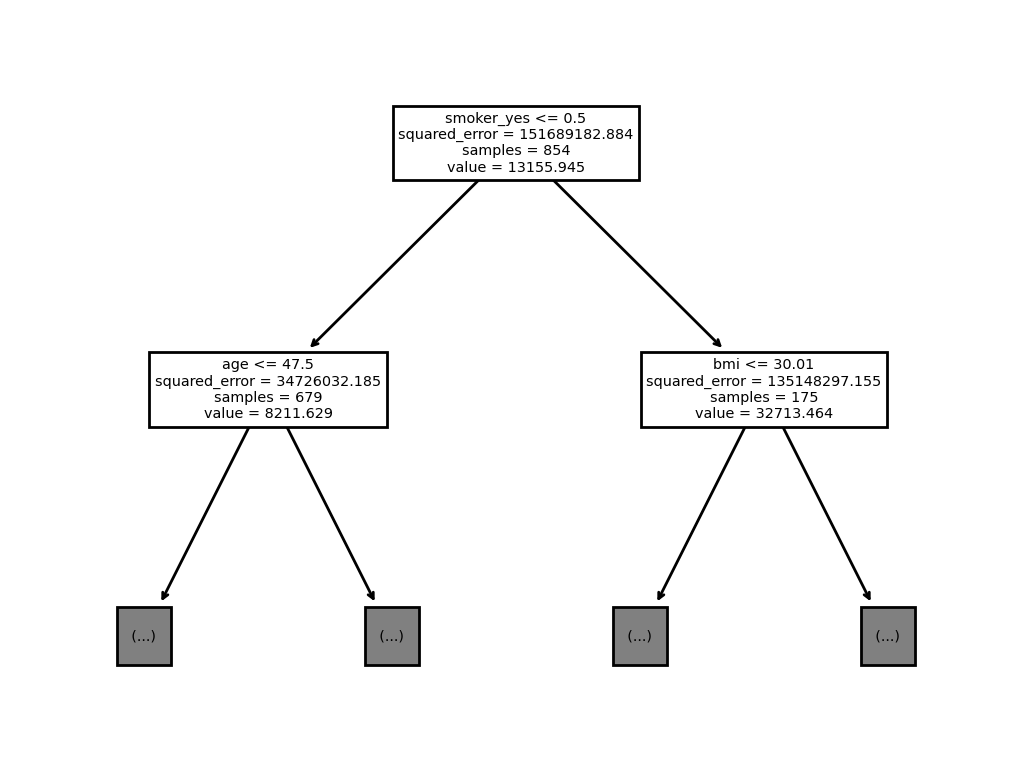

In [6]:
sklearn.tree.plot_tree(
    predictr.estimators_[4],  ## 4번째 tree
    feature_names = X.columns.to_list(),  ## 설명변수 이름
    max_depth = 1
);

fig = plt.gcf()
fig.set_dpi(200)

> 리샘플링을 하더라도, 개별 노드의 피쳐는 바뀌지 않을 것임.

**트리가 다양하지 않은 게 약점이다.** (왜?)

### **C. 우수성 vs 다양성**
---




`-` 다양성이 없는게 왜 문제인가?

* 기존의 의사결정나무 : 데이터에 최적화된 **똑똑한 하나**의 트리만 발견
* Bagging : "데이터의 최적화"를 희생하고 "다양성"을 확보. 즉, **똑똑한 하나**의 트리(원자료를 전부 사용한 트리)대신에 **모자란 여러 개**의 트리를 생성하고 힘을 합침.

`-` <span style="background-color:yellow;color:black">**비슷한 생각을 가진 10명의 천재**</span> vs <span style="background-color:blue;color:black">**다양한 의견을 가진 10명의 범재**</span>

* 뭐가 좋을까요?~(솔직히 전자가 더 좋은 것 같긴 한ㄷ)~

[ref:김용대 교수님](https://biz.heraldcorp.com/view.php?ud=20170802000434)

> 앙상블 : 같은 데이터를 여러 개의 기계학습 알고리즘들이 분석하여 각자 지식을 습득한 후 이를 결합하여 새롭고 유용한 지식을 창출하는 방법이다.
>
> 앙상블의 성능을 높이기 위해서는 개별 알고리즘들의 성능보다는 알고리즘들의 다양성이 훨씬 중요하다. 즉, 주어진 문제에 대해서 **모두 비슷한 답을 주는 성능이 우수한 10개의 알고리즘**보다는 성능은 좀 떨어지지만 **다양한 답을 제공하는 10개의 알고리즘**이 앙상블에는 더 효율적이다.

`-` 요약

* 통찰 : `Bagging`은 의사결정나무보다 다양성을 추구하는 알고리즘이다.
* 문제점 : 하지만 $\textbf{X}$가 고차원인 상황에서 배깅만으로는 그렇게 다양한 트리가 나오지 않는다.(모든 트리가 일괄적으로 흡연여부가 보험료에 미치는 영향을 우선적으로 연구함...)
* 소망 : 흡연여부만 연구하지 않고 다른 변수들을 최우선적으로 연구하는 사람이 있었으면 좋겠을 텐데...(그러면 트리가 더 다양해질 텐데...)

## 5. 랜덤포레스트

### **A. 개념**
---




`-` `RandomForest` = `Bagging` + `max_feafure = int`

> 요런 느낌...(강제로 안해본 것들에 대해서도 적합하도록 만듦)

`-` 알고리즘의 비교

In [ ]:
## Bagging
trees = []
for i in range(100) :
    tree = sklearn.tree.DecisionTreeRegressor()
    X_sample, y_sample = boostrap(X, y)  ## 실제론 없는 코드임, 함수지정 해줘야함... 아마도.
    tree.fit(X_sample, y_sample)  ## 붓스트랩 된 샘플로만 적합
    trees.append(tree)  ## 학습한 나무를 저장
    
yhat = ensemble(trees)  ## 이것도 실제론 없는 코드임... 그냥 종합한다고. 여러 개의 나무를 종합하여 하나의 예측값 산출

## RandomForest
forest = []
for i in range(100) :
    tree = sklearn.tree.DecisionTreeRegressor(max_features = 1)  ## 매순간 설명변수가 바뀜
    X_sample, y_sample = bootstrap(X, y)  ## 동일하게 매순간 샘플 바낌
    tree.fit(X_sample, y_sample)
    forest.append(tree)  ## 학습한 나무를 숲에 저장

yhat = ensemble(forest)  ## 배깅과 동일하게 평균으로 종합하여 하나의 예측값으로 산출

### **B. 일단 적합**
---




In [9]:
## step 1 -- 이미 함
## step 2
predictr = sklearn.ensemble.RandomForestRegressor(
    max_depth = 1,
    max_features = 1/3  ## parameter를 float으로 지정해줄 경우 비율로 지정됨
)

## step 3
predictr.fit(X, y)

RandomForestRegressor(max_depth=1, max_features=0.3333333333333333)

> 주의1 : `max_feature = 1`은 1개의 `feature`를 고려한다는 의미이고, `max_feature = 1.0`(default)은 100% `feature`를 고려한다는 의미이다.
>
> 주의2 : `max_features = 1.0`이면 "RandomForest = Bagging"이다.(물론 적합하는 수가 랜덤포레스트는 100개긴 함... 아무튼 따라서 반드시 따로 지정해줄 것.)

### **C. 시각화**
---




In [ ]:
fig.set_size_inches

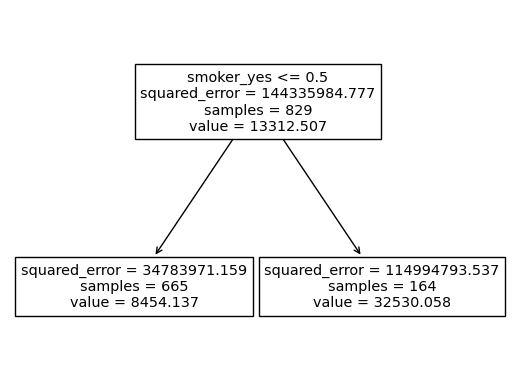

In [13]:
sklearn.tree.plot_tree(
    predictr.estimators_[5],
    feature_names = X.columns.to_list()
);

## 5. 랜덤포레스트 재현

### **A. `random_state` 추출**
---




In [15]:
predictr.estimators_

[DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=1031990468),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=1429725713),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=350207566),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=1100997744),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=510567808),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=1755990883),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=1996922071),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=674517068),
 DecisionTreeRegressor(max_depth=1, max_features=0.33333333

> 트리 오브젝트 각자 고유의 `random_state`를 가지고 있다.

`-` 첫번째 트리 : `random_state`확인

In [17]:
predictr.estimators_[0].random_state

1031990468

`-` 각 나무들의 `random_state` 추출

In [18]:
rs = [tree.random_state for tree in predictr.estimators_]

### **B. forest 생성**
---




In [19]:
sklearn.tree.DecisionTreeRegressor(
    max_depth = 1, max_features = 1/3,
    random_state = predictr.estimators_[0].random_state
)

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=1031990468)

In [20]:
my_forest = [sklearn.tree.DecisionTreeRegressor(max_depth = 1, max_features = 1/3, random_state = r) for r in rs]
##한번에
##my_forest = [sklearn.tree.DecisionTreeRegressor(max_depth = 1, max_features = 1/3, random_state = tree.random_state) for tree in predictr.estimators_]

In [21]:
my_forest[-1]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=1256409330)

In [22]:
predictr.estimators_[-1]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=1256409330)

> 똑같은 개체임니당.

### **C. 붓스트랩 샘플 생성**
---




`-` 저장된 부스트랩 샘플을 확보하자.

In [23]:
predictr.estimators_samples_  ## Bagging에서 썼던 코드...

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_samples_'

> 샘플들을 재현하기 귀찮게 되어있다...(그런 메소드는 없다네요...)

`-` 그냥 새로 만들어보자!(코드 뜯기)

In [24]:
sklearn.ensemble._forest._generate_sample_indices?

Signature:
sklearn.ensemble._forest._generate_sample_indices(
    random_state,
    n_samples,
    n_samples_bootstrap,
)
Docstring: Private function used to _parallel_build_trees function.
File:      c:\users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\ensemble\_forest.py
Type:      function

> 트리에 사용할 샘플을 만드는 코드.

`random_state`와 샘플의 크기, 붓스트랩 할 샘플의 크기를 지정하면 샘플의 인덱스를 내놓는 코드.

In [28]:
sample = sklearn.ensemble._forest._generate_sample_indices
sample(1,10,10)

array([5, 8, 9, 5, 0, 0, 1, 7, 6, 9])

`-` 원자료

In [29]:
df_train.shape

(1338, 7)

In [30]:
my_index = [sample(random_state = r, n_samples = 1338, n_samples_bootstrap = 1338) for r in rs]

> 샘플을 뽑는 `random_state`가 `r`인 인덱스가 나온다.

### **D. 적합**
---




In [35]:
for idx, tree in zip(my_index, my_forest) :
    X_sample, y_sample = X.loc[idx], y.loc[idx]
    ## or np.array(X)[idx], np.array(y)[idx]
    tree.fit(X_sample, y_sample)

## or
#for i in range(len(my_index)):
#    X_sample, y_sample = X.loc[my_index[i]], y.loc[my_index[i]]
#    my_forest[i].fit(X_sample, y_sample)

### **E. 앙상블**
---




In [41]:
np.array([tree.predict(X) for tree in my_forest]).mean(axis = 0).shape

(1338,)

In [44]:
def ensemble(forest) :
    return np.stack([tree.predict(X) for tree in my_forest]).mean(axis = 0)

In [47]:
ensemble(my_forest)

array([16637.15797026, 11985.8217605 , 12109.06436558, ...,
       11966.44532935, 10499.17514846, 18168.48871085])

In [48]:
predictr.predict(X)

array([16637.15797026, 11985.8217605 , 12109.06436558, ...,
       11966.44532935, 10499.17514846, 18168.48871085])

> 최종 결과가 나온다.

### **F. 주의**
---


`-` `max_depth`를 1로 제한한 이유

> `max_depth`가 깊을 경우 두 결과가 일치하지 않을 수 있다.

* 실제 돌아가는 코드와의 괴리

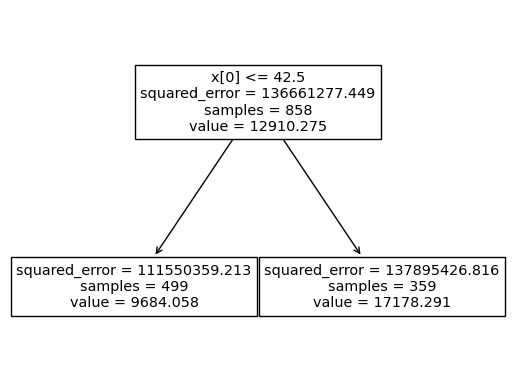

In [51]:
sklearn.tree.plot_tree(predictr.estimators_[0]);

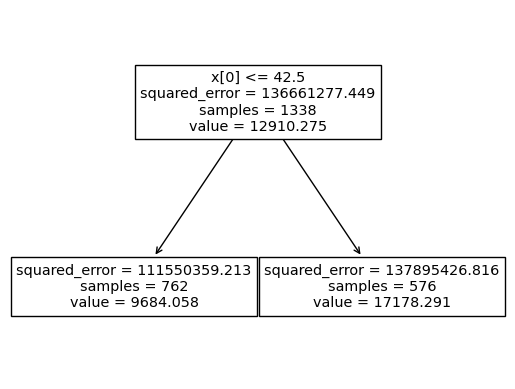

In [53]:
sklearn.tree.plot_tree(my_forest[0]);

> `samples`의 값이 다름. 배깅도 그렇고, 랜덤포레스트도 그렇고 적합 중 가중치(`predictr.fit(sample_weight = [...]`)를 취하는 방식으로 적합하기 때문.

`max_depth`가 깊을 경우 샘플이 하나여서 더이상 노드를 나누지 못할 수 있음. 가중치를 지정해줄 수도 있지만, 그건 너무 과잉투자인 것 같아 이정도만 설명하고 넘어갑니당...